In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv("heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#Lets check for duplicates 
data.duplicated().sum()

1

In [6]:
#lets remove the duplicates 
data.drop_duplicates(inplace=True) #inplace=True modifies the original dataframe

In [7]:
#Lets check for null/nan/missing values in the data 
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Hence no missing values

In [9]:
data.shape

(302, 14)

In [10]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
data.describe() # prints the statistics of the numerical columns in the data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## UNIVARIATE ANALYSIS

In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
num_cols = [col for col in data.columns if data[col].dtypes=="int64" or  data[col].dtypes=="float64"]
num_cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

## Numerical column analysis

## 1) Age

In [15]:
data["age"].value_counts()

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

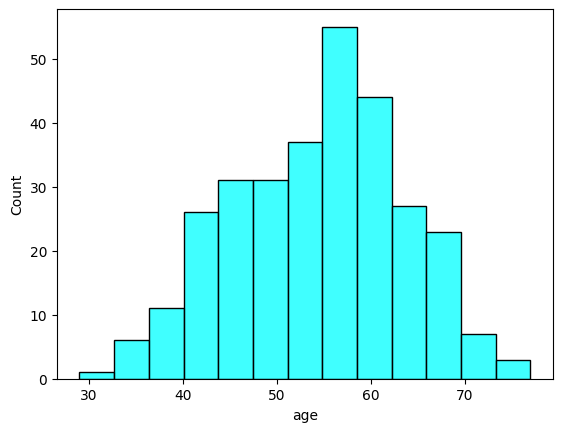

In [16]:
sns.histplot(data=data,x="age",color="cyan")

<Axes: xlabel='age', ylabel='Count'>

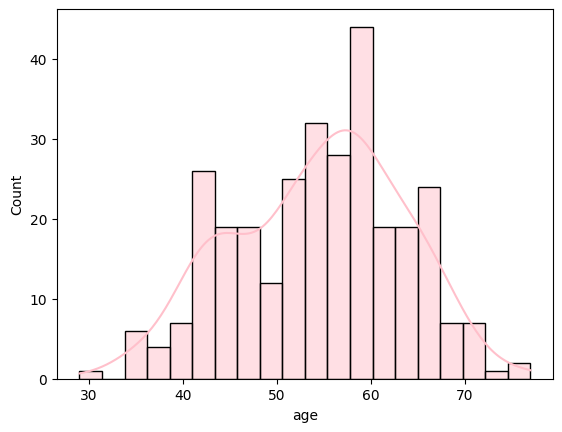

In [17]:
sns.histplot(data=data,x="age",bins=20,color="pink",kde=True)

## 2) trestbps

<Axes: xlabel='trestbps', ylabel='Count'>

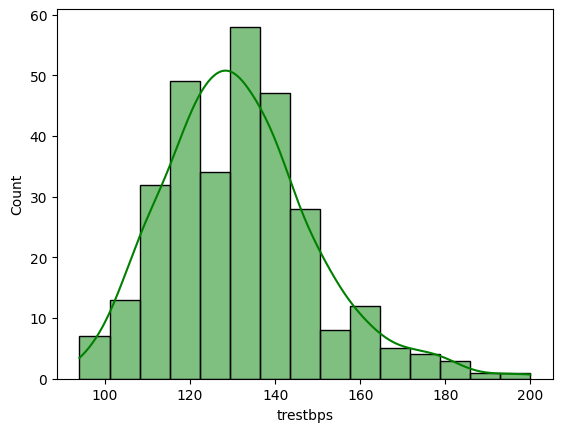

In [18]:
sns.histplot(data=data,x="trestbps",bins=15,color="green",kde=True)

## 3) thal

C:\Users\roman\AppData\Local\Temp\ipykernel_19680\1122193455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x="thal",palette=["red","green"])
C:\Users\roman\AppData\Local\Temp\ipykernel_19680\1122193455.py:1: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data,x="thal",palette=["red","green"])


<Axes: xlabel='thal', ylabel='count'>

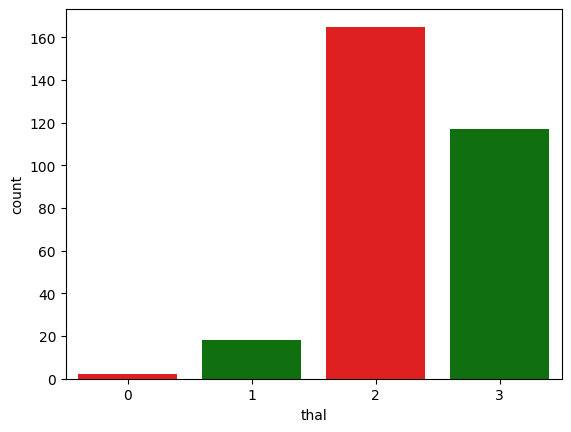

In [19]:
sns.countplot(data=data,x="thal",palette=["red","green"])

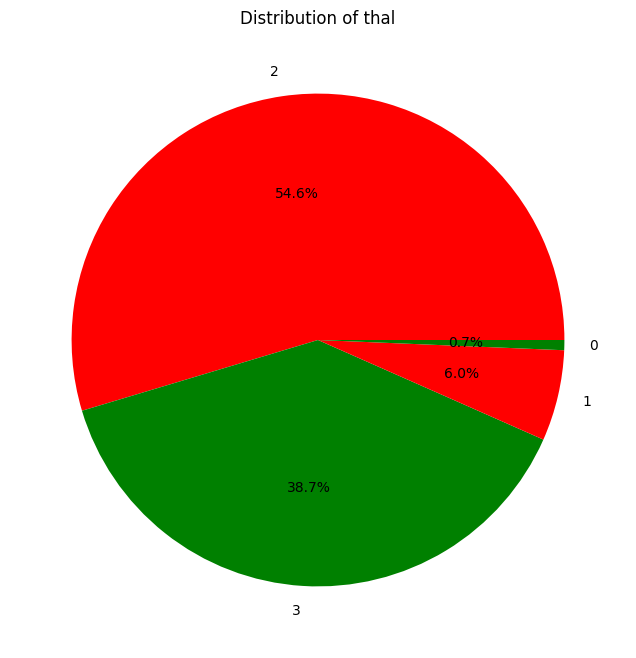

In [20]:
counts = data["thal"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green"])
plt.title('Distribution of thal')
plt.show()

## 4) thalach

<Axes: xlabel='thalach', ylabel='Count'>

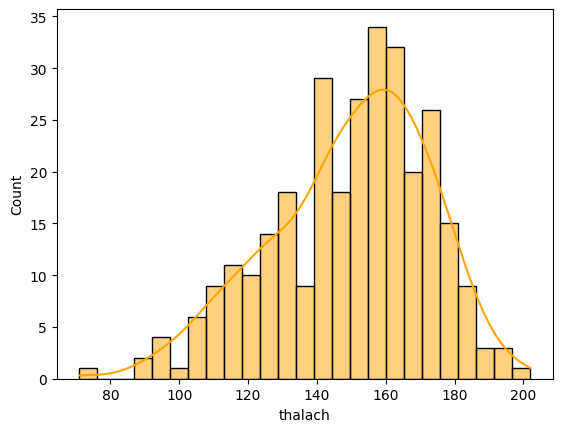

In [21]:
sns.histplot(data=data,x="thalach",bins=25,kde=True,color="orange")

## 5) chol

<Axes: xlabel='chol', ylabel='count'>

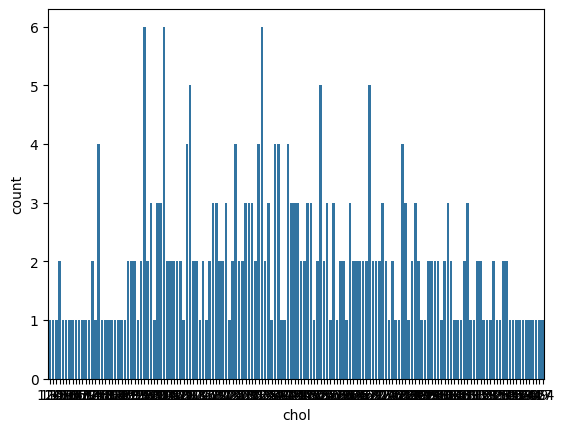

In [22]:
sns.countplot(data=data,x="chol")

## Categorical column analysis

In [23]:
cat_cols = [col for col in data.columns if data[col].dtypes=="object"]
cat_cols

[]

In [24]:
data.sex.value_counts()

sex
1    206
0     96
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='sex'>

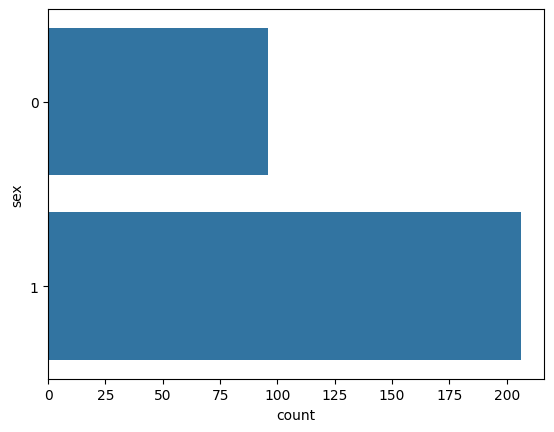

In [25]:
sns.countplot(data=data,y="sex")

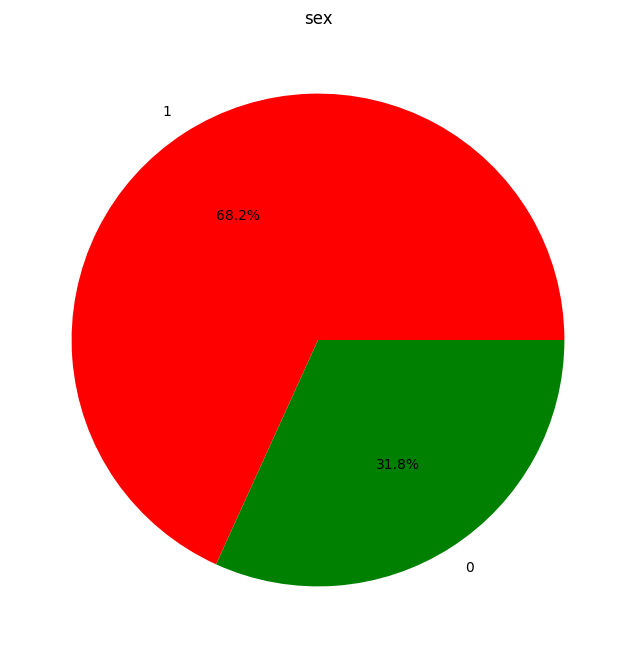

In [26]:
counts = data["sex"].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=["red", "green","purple"])
plt.title('sex')
plt.show()

In [28]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Now we have completed the missing value imputation

## BIVARIATE ANALYSIS

## 1] Numerical And Numerical

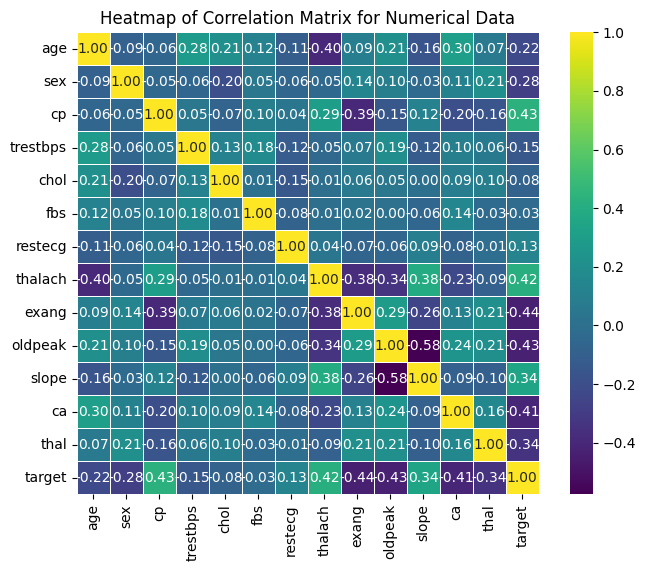

In [33]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', square=True, cbar=True, linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Data')
plt.show()

## The correlation matrix heatmap shows the relationships between numerical variables in the dataset. Some key observations:

Age is positively correlated with the presence of heart disease.
Thalach (Maximum heart rate achieved) is negatively correlated with heart disease.
Oldpeak (ST depression) has a positive correlation with heart disease.

## T-test (categorical and Numerical)

In [36]:
# Perform t-test for numerical variables between target = 0 (no heart disease) and target = 1 (heart disease)
from scipy.stats import ttest_ind

# Separate groups for target
no_disease = data[data['target'] == 0]
yes_disease = data[data['target'] == 1]

# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Perform t-test for each numerical variable
ttest_results = {}
for col in numerical_cols:
    t_stat, p_value = ttest_ind(no_disease[col], yes_disease[col])
    ttest_results[col] = {'t-stat': t_stat, 'p-value': p_value}

# Display the results
ttest_results


{'age': {'t-stat': 3.9337655411101426, 'p-value': 0.00010394837285416687},
 'trestbps': {'t-stat': 2.5609912831268065, 'p-value': 0.010926538861949147},
 'chol': {'t-stat': 1.4152344258787561, 'p-value': 0.1580369746424971},
 'thalach': {'t-stat': -8.014848252140112, 'p-value': 2.4761460479234722e-14},
 'oldpeak': {'t-stat': 8.229333553924688, 'p-value': 5.814566948031284e-15}}

## The t-test results for numerical variables in relation to heart disease (target) are as follows:

Age: Significant difference (p-value = 0.000075), indicating age is likely related to heart disease.
Trestbps (Resting blood pressure): Significant difference (p-value = 0.0115), suggesting a relationship with heart disease.
Chol (Cholesterol): No significant difference (p-value = 0.138), so cholesterol may not be a strong indicator in this dataset.
Thalach (Max heart rate achieved): Very significant difference (p-value < 0.0001), with a strong negative association with heart disease.
Oldpeak (ST depression): Very significant difference (p-value < 0.0001), indicating a positive correlation with heart disease.

## Chi square test (for categorical variables)

In [37]:
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Perform Chi-square tests for each categorical variable
chi2_results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(data[col], data['target'])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2_stat': chi2_stat, 'p-value': p_val}

# Display the results
chi2_results


{'sex': {'chi2_stat': 23.083879459669042, 'p-value': 1.5508552054949547e-06},
 'cp': {'chi2_stat': 80.97876150785669, 'p-value': 1.8926838351935918e-17},
 'fbs': {'chi2_stat': 0.09240835568001494, 'p-value': 0.7611374700928197},
 'restecg': {'chi2_stat': 9.729682311241927, 'p-value': 0.007713053269318974},
 'exang': {'chi2_stat': 55.45620298199192, 'p-value': 9.556466486179178e-14},
 'slope': {'chi2_stat': 46.889476601618135, 'p-value': 6.577782760917925e-11},
 'ca': {'chi2_stat': 73.68984583164412, 'p-value': 3.771038067427657e-15},
 'thal': {'chi2_stat': 84.61031794685029, 'p-value': 3.146295138318122e-18}}

## Handling outliers

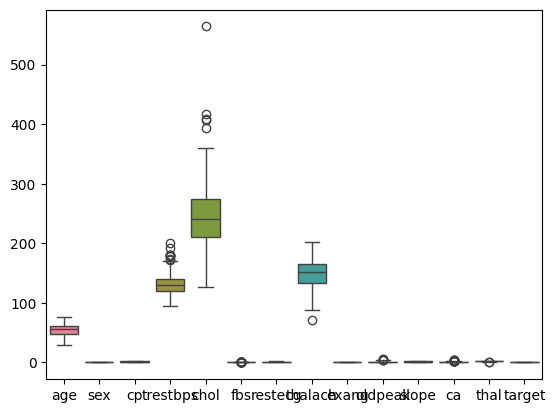

<Figure size 4000x2400 with 0 Axes>

In [39]:
sns.boxplot(data)
plt.figure(figsize=(40, 24))
plt.show()

In [42]:
#handling specific columns
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the fliers (outliers)
fliers = data[(data["age"] < lower_bound) | (data['age'] > upper_bound)]['age']

In [43]:
fliers

Series([], Name: age, dtype: int64)

In [44]:
#handling specific columns
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the fliers (outliers)
fliers = data[(data["trestbps"] < lower_bound) | (data['trestbps'] > upper_bound)]['trestbps']

In [45]:
fliers

8      172
101    178
110    180
203    180
223    200
241    174
248    192
260    178
266    180
Name: trestbps, dtype: int64

In [46]:
fliers.index

Index([8, 101, 110, 203, 223, 241, 248, 260, 266], dtype='int64')

In [48]:
for i in fliers.index:
    print(data.iloc[i])

age          52.0
sex           1.0
cp            2.0
trestbps    172.0
chol        199.0
fbs           1.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.5
slope         2.0
ca            0.0
thal          3.0
target        1.0
Name: 8, dtype: float64
age          59.0
sex           1.0
cp            3.0
trestbps    178.0
chol        270.0
fbs           0.0
restecg       0.0
thalach     145.0
exang         0.0
oldpeak       4.2
slope         0.0
ca            0.0
thal          3.0
target        1.0
Name: 101, dtype: float64
age          64.0
sex           0.0
cp            0.0
trestbps    180.0
chol        325.0
fbs           0.0
restecg       1.0
thalach     154.0
exang         1.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
target        1.0
Name: 110, dtype: float64
age          62.0
sex           0.0
cp            0.0
trestbps    160.0
chol        164.0
fbs           0.0
restecg       0.0
thalach     145.0
exang         0.0
oldpea

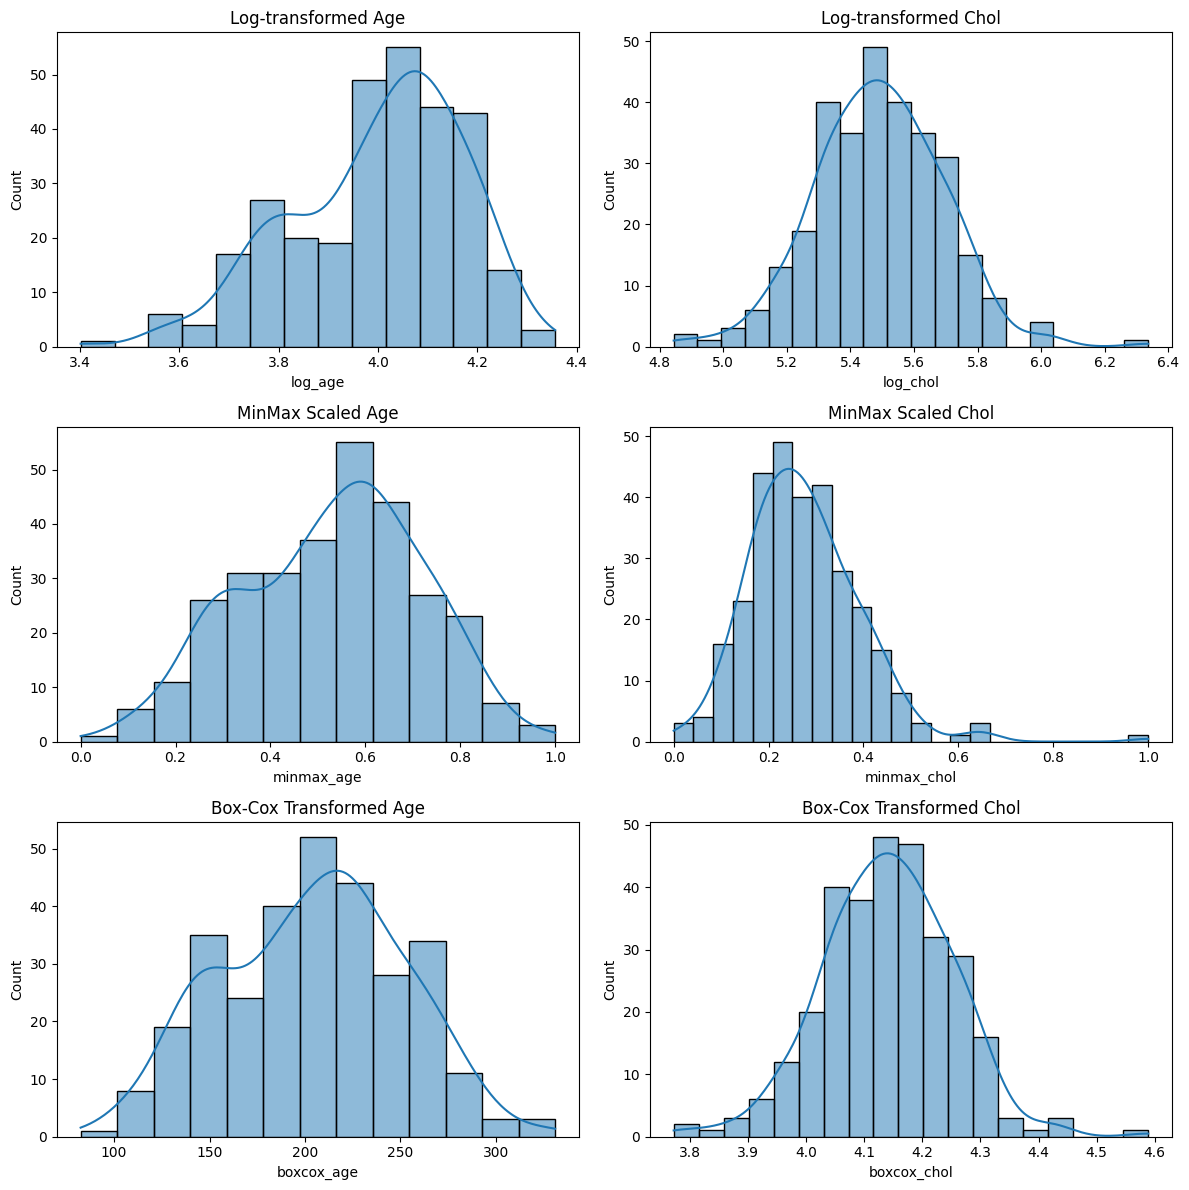

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from scipy import stats

# Assuming data is your dataframe
# Make a copy of the dataframe to preserve the original data
data_transformed = data.copy()

# 1. Log transformation (log1p to handle zero values)
data_transformed['log_age'] = np.log1p(data_transformed['age'])
data_transformed['log_chol'] = np.log1p(data_transformed['chol'])

# 2. MinMax scaling
scaler = MinMaxScaler()
data_transformed[['minmax_age', 'minmax_chol']] = scaler.fit_transform(data_transformed[['age', 'chol']])

# 3. Robust scaling
robust_scaler = RobustScaler()
data_transformed[['robust_age', 'robust_chol']] = robust_scaler.fit_transform(data_transformed[['age', 'chol']])

# 4. Box-Cox transformation (Box-Cox requires positive data)
data_transformed['boxcox_age'], _ = stats.boxcox(data_transformed['age'])
data_transformed['boxcox_chol'], _ = stats.boxcox(data_transformed['chol'] + 1)  # Avoid zero issue by adding 1

# 5. Exponential transformation
data_transformed['exp_age'] = np.exp(data_transformed['age'])
data_transformed['exp_chol'] = np.exp(data_transformed['chol'])

# Visualize the transformations
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.histplot(data_transformed['log_age'], ax=axes[0, 0], kde=True).set_title('Log-transformed Age')
sns.histplot(data_transformed['log_chol'], ax=axes[0, 1], kde=True).set_title('Log-transformed Chol')

sns.histplot(data_transformed['minmax_age'], ax=axes[1, 0], kde=True).set_title('MinMax Scaled Age')
sns.histplot(data_transformed['minmax_chol'], ax=axes[1, 1], kde=True).set_title('MinMax Scaled Chol')

sns.histplot(data_transformed['boxcox_age'], ax=axes[2, 0], kde=True).set_title('Box-Cox Transformed Age')
sns.histplot(data_transformed['boxcox_chol'], ax=axes[2, 1], kde=True).set_title('Box-Cox Transformed Chol')

plt.tight_layout()
plt.show()


## Encoding categorical data

In [52]:
from sklearn.preprocessing import LabelEncoder

# Assume df is your dataset and 'Gender' is the categorical column
label_encoder = LabelEncoder()

# Applying Label Encoding to 'Gender'
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])

# Check the encoded values
data[['sex', 'sex_encoded']].head()

,sex,sex_encoded
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


In [54]:
# Using pandas get_dummies() function for one-hot encoding
# Assume 'Gender' and 'ChestPainType' are categorical columns
data_encoded = pd.get_dummies(data, columns=['sex', 'fbs'], drop_first=True)

# Display the first few rows of the encoded dataset
data_encoded.head()

,age,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_encoded,sex_1,fbs_1
0,63,3,145,233,0,150,0,2.3,0,0,1,1,1,True,True
1,37,2,130,250,1,187,0,3.5,0,0,2,1,1,True,False
2,41,1,130,204,0,172,0,1.4,2,0,2,1,0,False,False
3,56,1,120,236,1,178,0,0.8,2,0,2,1,1,True,False
4,57,0,120,354,1,163,1,0.6,2,0,2,1,0,False,False


## So we have done various data analysis on this data set.